In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from glob import glob
import matplotlib.cm as cm
from scipy.misc import imresize
import cv2
import pandas as pd
import scipy.io as io

C:\Anaconda-python\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


# Data Extraction from matlab file

In [2]:
def data_extraction(path):
    data_l, data_r, data_all = [], [], []
    nor_data = io.loadmat(path)
    temp = nor_data['data']
    r = temp['right']
    l = temp['left']
    r_temp = r[0,0]
    l_temp = l[0,0]
    data_r.append(r_temp['image'][0][0])
    data_r.append(r_temp['gaze'][0][0])
    data_r.append(r_temp['pose'][0][0])
    data_l.append(l_temp['image'][0][0])
    data_l.append(l_temp['gaze'][0][0])
    data_l.append(l_temp['pose'][0][0])
    for i in range(3):
        data_all.append(data_r[i])
        data_all.append(data_l[i])
    return data_all

In [3]:
data_test = data_extraction('C:/MPIIGaze/MPIIGaze/Data/Normalized/p00/day01.mat')

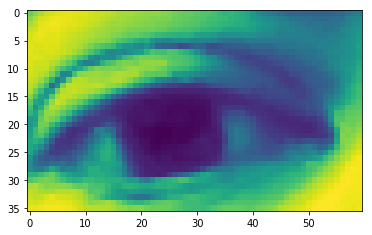

In [4]:
plt.imshow(data_test[0][0])

In [5]:
data_test[0][0].shape

(36, 60)

In [6]:
data_test[5][4].shape

(3,)

In [7]:
def label_extraction(path, screen_path):
    txt = pd.read_csv(path, sep = ' ', header= None)
    screen = io.loadmat(screen_path)
    df_anno = pd.DataFrame(txt)
    data_frame = pd.DataFrame()
    data_frame['Screen_x'] = df_anno[:][24] / screen['width_pixel'][0][0]
    data_frame['Screen_y'] = df_anno[:][25] / screen['height_pixel'][0][0]
    return data_frame

In [8]:
data_label =label_extraction('C:/MPIIGaze/MPIIGaze/Data/Original/p00/day01/annotation.txt',
                            'C:/MPIIGaze/MPIIGaze/Data/Original/p00/Calibration/screenSize.mat')

In [9]:
def path_optimization(day_list, path):
    all_path = []
    cnt = 0
    for i in range(len(day_list)): # 15번 
        temp = []
        for j in range(day_list[i]):
            temp.append(path[cnt])
            cnt += 1
        all_path.append(temp)
    return all_path

day_list = [39, 69, 39, 65, 25, 38, 62, 56, 47, 20, 16, 19, 7, 12, 7]  
data_path = glob('C:/MPIIGaze/MPIIGaze/Data/Normalized/*/*') # 521개
data_path = path_optimization(day_list, data_path)
#data_path = path_optimization(glob('C:/MPIIGaze/MPIIGaze/Data/Normalized/*/*'))
label_path = glob('C:/MPIIGaze/MPIIGaze/Data/Original/*/*/annotation.txt') # 521개
label_path = path_optimization(day_list, label_path)
#label_path = path_optimzation(glob('C:/MPIIGaze/MPIIGaze/Data/Original/*/*/annotation.txt'))
screen_size_path = glob('C:/MPIIGaze/MPIIGaze/Data/Original/*/Calibration/screenSize.mat') # 15개

for i in range(15): # 총 15명
    data = [] # 사람별로 나눈 데이터
    label = [] # 사람별로 나눈 라벨   
    for j in range(day_list[i]): # 각 사람에 맞는 day만큼
        data.append(data_extraction(data_path[i][j]))
        label.append(label_extraction(label_path[i][j], screen_size_path[i]))
    exec('p%d_data = data' % (i))
    exec('p%d_label = label' % (i))


In [11]:
print(p0_data)

[[array([[[198, 210, 222, ...,  96, 102, 110],
        [210, 225, 238, ..., 110, 117, 120],
        [223, 232, 245, ..., 115, 123, 128],
        ...,
        [234, 230, 232, ..., 249, 250, 250],
        [240, 237, 242, ..., 249, 249, 249],
        [247, 246, 249, ..., 249, 248, 249]],

       [[240, 245, 247, ...,  92, 100, 106],
        [242, 246, 246, ...,  95, 100, 110],
        [241, 245, 243, ..., 100, 103, 106],
        ...,
        [254, 254, 253, ..., 253, 254, 252],
        [255, 255, 254, ..., 254, 253, 251],
        [255, 255, 254, ..., 255, 253, 251]],

       [[233, 241, 245, ...,  85,  88,  96],
        [236, 241, 244, ...,  91,  96, 105],
        [238, 241, 242, ...,  99,  99, 107],
        ...,
        [254, 254, 253, ..., 253, 252, 250],
        [255, 255, 254, ..., 253, 251, 249],
        [255, 255, 255, ..., 252, 250, 249]],

       ...,

       [[220, 218, 218, ..., 173, 175, 188],
        [223, 227, 230, ..., 197, 202, 202],
        [226, 231, 235, ..., 208, 209, 2

In [23]:
p0_data[4][5].shape

(520, 3)